In [1]:
import sys
print(sys.version)
%matplotlib inline
from xhistogram.xarray import histogram
%run -i ~/Python/pjr3

3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:56:21) 
[GCC 10.3.0]
pjr3.py complete


ERROR 1: PROJ: proj_create_from_database: Open of /home/jupyter-phil/.conda/envs/pjrpy3/share/proj failed


In [2]:
Varlist = np.array(['T','Q','CLOUD','CLDLIQ','ICWMR','CLDICE','RELHUM','NUMICE','NUMLIQ','Mass_bc'])
#                    RESTOM','FLNT','FSNT','TS','TMQ','PRECT','AEROD_v','CLDLOW','CLDTOT','LWCF','SWCF','TGCLDIWP','TGCLDLWP','SHFLX','LHFLX','PBLH','PCONVT','PRECC','PRECS'])
#Varlist = np.array(['TS','TMQ','PRECT'])
#Varlist = np.array(['RESTOM','LWCF','SWCF','FLNT','FSNT'])

Varname = 'TS' # Varlist[0]

case_start1 = "/home/jupyter-haruki/work/CESM_MCB/Fixed_SST/"
case_end1 = "Fixed_SST.cam.h0."+Varname+".y1-19.nc"
ind1 = case_start1+case_end1
DS1 = xr.open_mfdataset(ind1)


Var1a = DS1[Varname]
Var1am = Var1a.mean(dim='time')
DS1 = center_time(DS1)
Var1 = DS1[Varname]
#print('xxx',Var1)

case_start2 = "/home/jupyter-haruki/work/CESM_MCB/MCB_R1R2R3_CN375cm/" 
case_end2 = "MCB_R1R2R3_CN375cm.cam.h0."+Varname+".y1-10.nc"
ind2 = case_start2+case_end2
DS2 = xr.open_mfdataset(ind2)
DS2 = center_time(DS2)
Var2 = DS2[Varname]
#print('yyy',Var2)


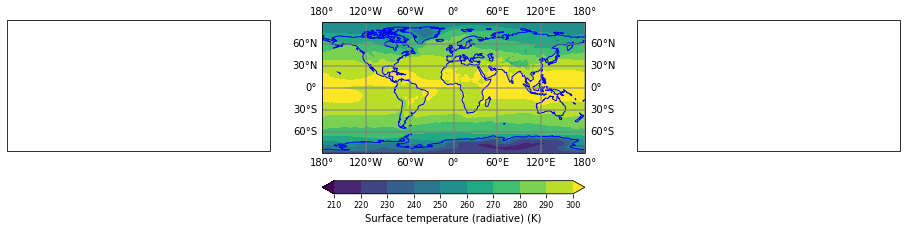

In [3]:
def xr_llhplot(xrVar, plotproj=None, ax=None, cax=None,ylabels=None,clevs=None, cmap=None, title=None):
    """xr_llhplot xarray lat lon horizontal plot
    """
    #print(' entering xr_llhplot', xrVar)
    
    lon=xrVar['lon'].values
    lat=xrVar['lat'].values
    xv,yv=np.meshgrid(lon,lat)
    data_regridded = xrVar.values
    #print('aaa',data_regridded.shape, xv.shape, yv.shape)
    df = data_regridded.flatten()
    dsub = df[np.isfinite(df)] # ignore NaN
    zmax = dsub.max()
    zmin = dsub.min()
    #print('masked interpolated range',zmin,zmax)
    dataproj=ccrs.PlateCarree()    # data is always assumed to be lat/lon
    if ylabels is None: ylabels = True
    if clevs is None:
        clevs = findNiceContours(np.array([zmin,zmax]),nlevs=10)
    #print('clevs',clevs)
    if cmap is None:
        #print('aaa, grabbing cmap default')
        cmap = mpl.cm.get_cmap()
        #print('bbb',cmap.N)
    #print('cmap',cmap)
    extend = 'both'
    norm = mpl.colors.BoundaryNorm(clevs,cmap.N,extend=extend)
    #print('norm',norm(clevs))
    clat = (lat.min()+lat.max())/2.
    clon = (lon.min()+lon.max())/2.
    if plotproj is None:
        plotproj = ccrs.PlateCarree()
    #ax.set_extent([lon.values.min(), 260., lat.values.min(), lat.values.max()])
    #ax.set_global()
    #print('plotproj is ',plotproj)
    #rint('ax',ax)
 
    # if no ax argument, could get current axis, or create it
    if ax is None:
        #print('grab current axis')
        #ax = plt.gca()
        ax = plt.axes(projection=plotproj)

    if cax is None: cax = ax
    pl = ax.contourf(xv, yv, data_regridded, levels=clevs, # vmin=zmin, vmax=zmax,
                     norm=norm, cmap=cmap,
                     extend=extend, transform=ccrs.PlateCarree())

    # Add colorbar to plot
    cb = plt.colorbar(
        pl, orientation='horizontal',ticks=clevs,ax=cax,
        label='%s (%s)'%(xrVar.long_name, xrVar.units), pad=0.1
    )
    if not title is None:
        ax.set_title(title)
        
    cb.ax.tick_params(labelsize=8)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5)
    gl.left_labels=ylabels
    gl.right_labels=ylabels
    ax.coastlines(linewidth=1,color='blue')
    return

Var = Var1.mean(dim='time',keep_attrs=True)

plotproj = ccrs.PlateCarree()
#plotproj=ccrs.Mercator()
#plotproj=ccrs.Orthographic(central_latitude=0,central_longitude=55)   # any projections should work


if True:
    fig, axes = plt.subplots(ncols=3
                         ,gridspec_kw={'width_ratios': [1, 1, 1]}
                         ,subplot_kw={'projection': plotproj}
                         ,figsize=(16,5)
                        )
 
xr_llhplot(Var,ax=axes[1])
#xr_llhplot(Var)


In [4]:
case_start1 = "/home/jupyter-haruki/work/CESM_MCB/MCB_R1R2R3_CN600cm/MCB_R1R2R3_CN600cm.cam.h0."
case_end1 = ".y1-10.nc"
fstring ='%s%s%s' 
fstring ='%s%.1s%.0s' 

Varlist = np.array(['RESTOM','FLNT'])
for Varname in Varlist:
    #print('xxx',strtest)
    #ind1='yyy %s,x,%s' % (Varlist[-1],Varname)
    ind1 = fstring % (case_start1,Varname,case_end1)
    print(ind1)

/home/jupyter-haruki/work/CESM_MCB/MCB_R1R2R3_CN600cm/MCB_R1R2R3_CN600cm.cam.h0.R
/home/jupyter-haruki/work/CESM_MCB/MCB_R1R2R3_CN600cm/MCB_R1R2R3_CN600cm.cam.h0.F



-------------------------------FLNT
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
FLNT Net longwave flux at top of model Range V1 and V2  125.640274 299.5948 124.97594 298.65323
V1A 239.846  V2A 239.870  DVA -0.023


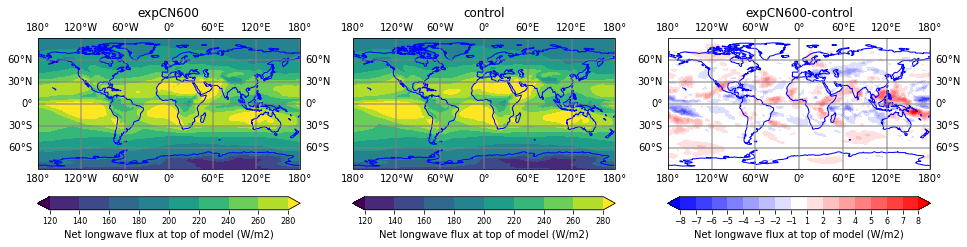

field processing complete

-------------------------------FSNT
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
FSNT Net solar flux at top of model Range V1 and V2  50.431446 355.62488 50.851166 357.46353
V1A 239.446  V2A 240.506  DVA -1.061


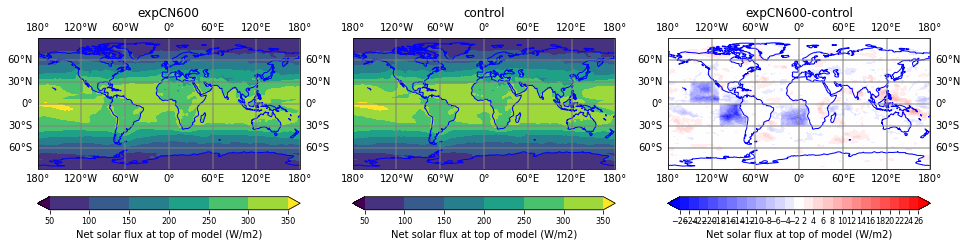

field processing complete

-------------------------------TS
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
TS Surface temperature (radiative) Range V1 and V2  212.68358 306.54962 212.24316 306.281
V1A 288.649  V2A 288.663  DVA -0.014


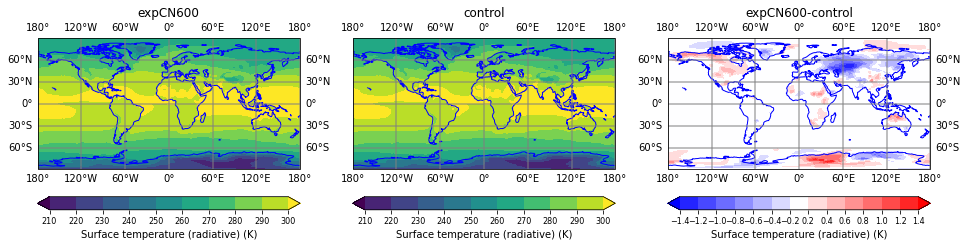

field processing complete

-------------------------------PRECC
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
PRECC Convective precipitation rate (liq + ice) Range V1 and V2  0.0 10.953891 0.0 10.396528
V1A 1.370  V2A 1.368  DVA 0.003


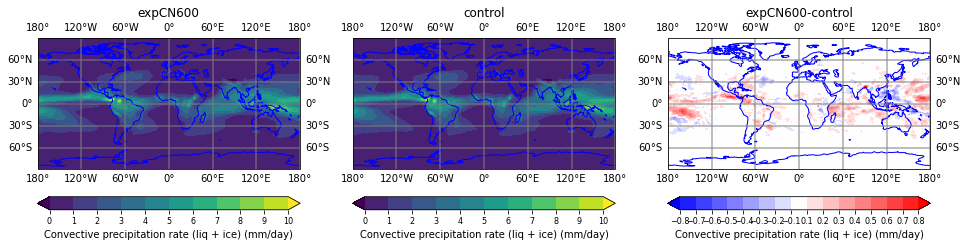

field processing complete

-------------------------------PRECL
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
PRECL Stratiform (liq,ice) Precipitation Range V1 and V2  0.0054089422 15.371059 0.01959284 13.106075
V1A 1.643  V2A 1.641  DVA 0.002


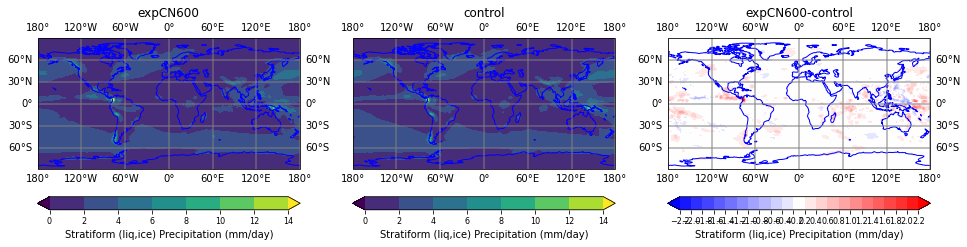

field processing complete

-------------------------------AODVIS
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
add units attribute
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
add units attribute
AODVIS Aerosol optical depth 550 nm Range V1 and V2  0.012715772 1.0660545 0.012806564 1.048133
V1A 0.165  V2A 0.163  DVA 0.002


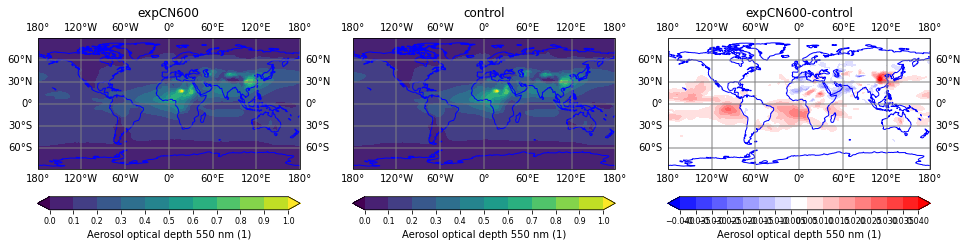

field processing complete

-------------------------------CLDLOW
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
CLDLOW Vertically-integrated low cloud Range V1 and V2  0.0 0.9703335 0.0 0.9673925
V1A 0.398  V2A 0.396  DVA 0.002


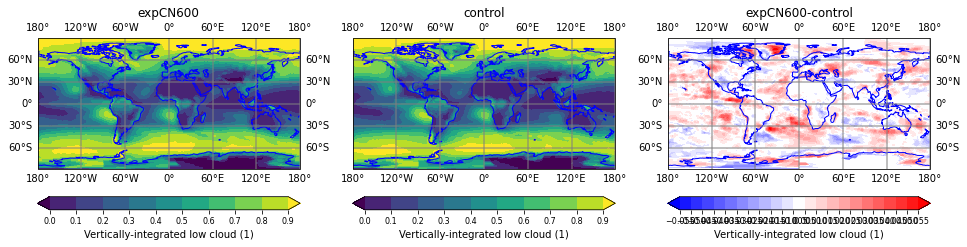

field processing complete

-------------------------------CLDTOT
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
CLDTOT Vertically-integrated total cloud Range V1 and V2  0.16320376 0.9867812 0.17263614 0.98706734
V1A 0.678  V2A 0.676  DVA 0.002


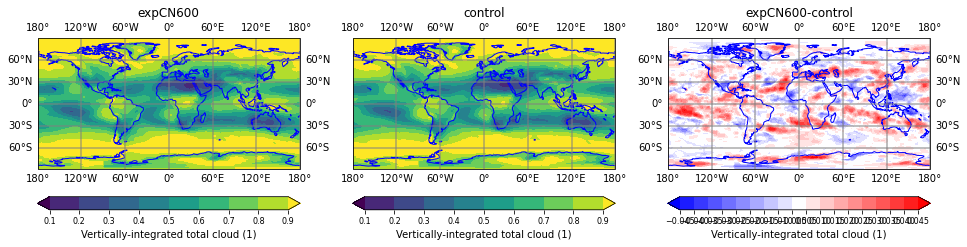

field processing complete

-------------------------------LWCF
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
LWCF Longwave cloud forcing Range V1 and V2  -1.0825778 84.743 -1.0921819 80.78192
V1A 23.734  V2A 23.740  DVA -0.006


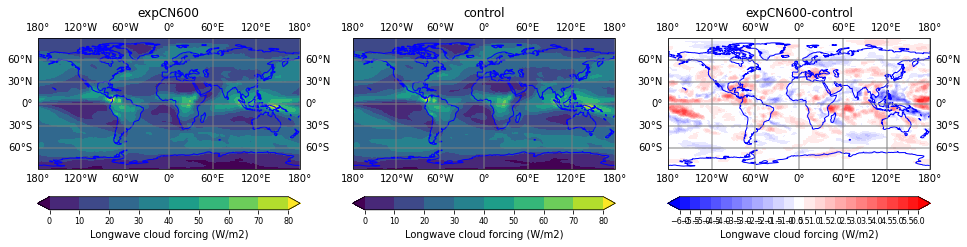

field processing complete

-------------------------------SWCF
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
SWCF Shortwave cloud forcing Range V1 and V2  -145.27261 -0.19468069 -139.48915 -0.2029937
V1A -48.735  V2A -47.721  DVA -1.014


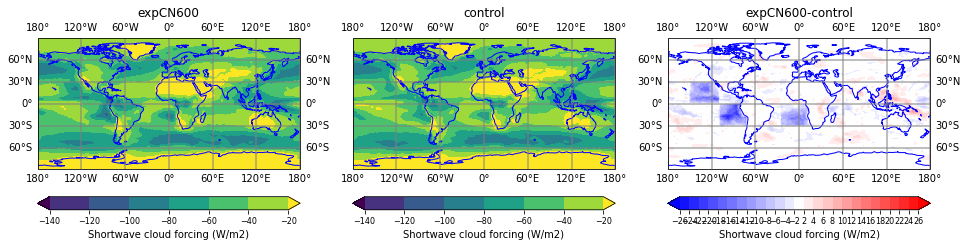

field processing complete

-------------------------------TGCLDIWP
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
TGCLDIWP Total grid-box cloud ice water path Range V1 and V2  9.493019e-05 0.09801026 0.00012565072 0.09393484
V1A 0.014  V2A 0.014  DVA -0.000


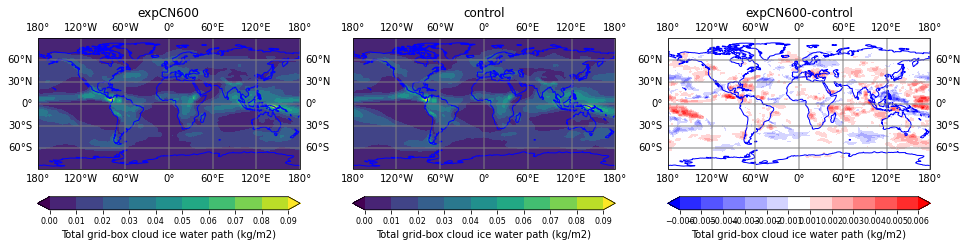

field processing complete

-------------------------------TGCLDLWP
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
TGCLDLWP grid-avg LWP. Range V1 and V2  0.03959699 162.47348 0.04716635 162.05135
V1A 55.236  V2A 54.329  DVA 0.907


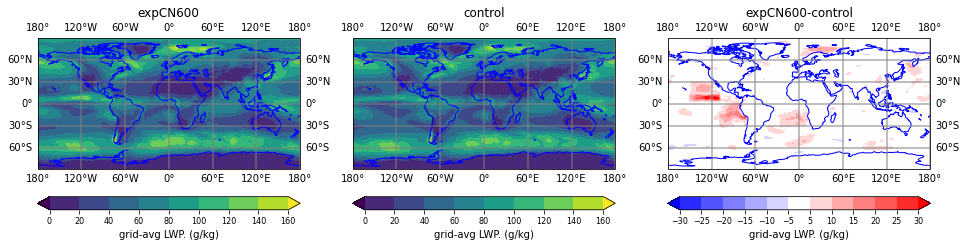

field processing complete

-------------------------------SHFLX
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
SHFLX Surface sensible heat flux Range V1 and V2  -51.196438 107.17414 -50.321777 104.42782
V1A 19.992  V2A 20.033  DVA -0.041


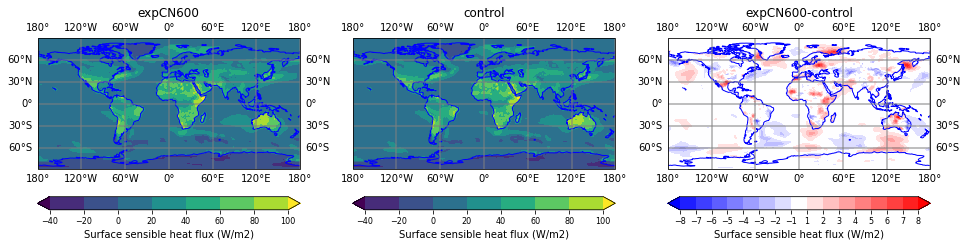

field processing complete

-------------------------------LHFLX
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
LHFLX Surface latent heat flux Range V1 and V2  -1.1102837 271.7244 -1.0874759 264.70038
V1A 87.243  V2A 87.101  DVA 0.142


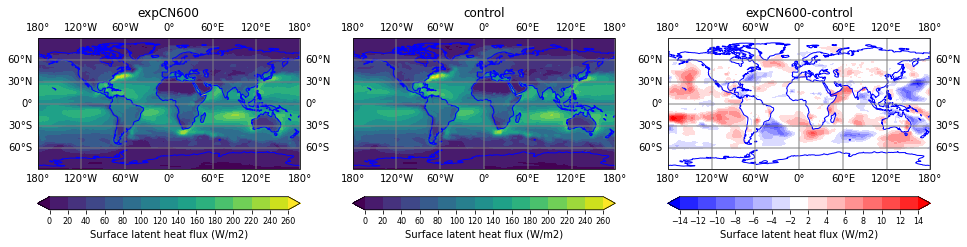

field processing complete

-------------------------------PBLH
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
PBLH PBL height Range V1 and V2  88.11918 1311.529 87.02497 1275.504
V1A 713.748  V2A 713.728  DVA 0.020


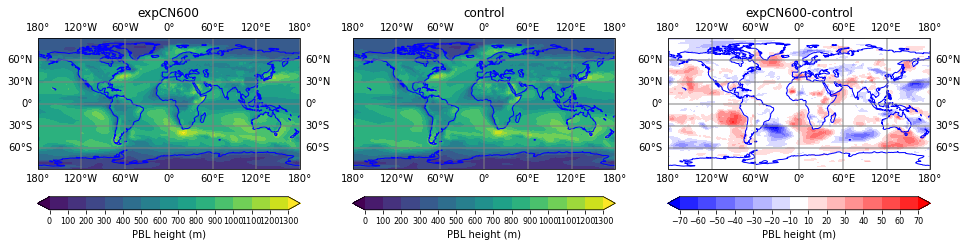

field processing complete

-------------------------------PRECSC
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
PRECSC Convective snow rate (water equivalent) Range V1 and V2  0.0 2.3938758e-09 0.0 2.4045987e-09
V1A 0.000  V2A 0.000  DVA -0.000


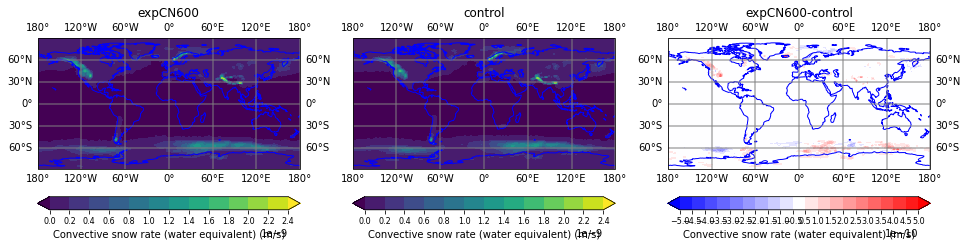

field processing complete

-------------------------------PRECSL
opening /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
opening /work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc
PRECSL Large-scale (stable) snow rate (water equivalent) Range V1 and V2  0.0 4.7101903e-08 0.0 5.0532133e-08
V1A 0.000  V2A 0.000  DVA -0.000


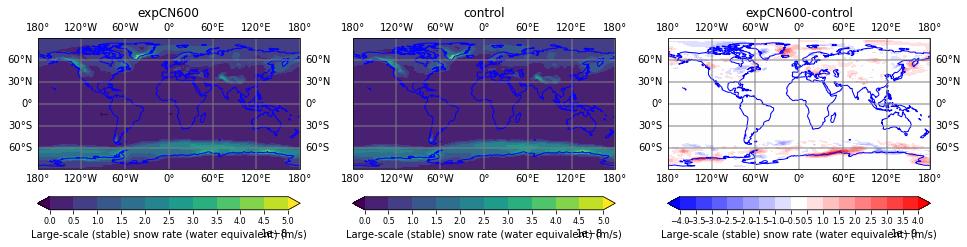

field processing complete


In [16]:
regtag = ""
weights = None

Varlist = np.array(['RESTOM','FLNT','FSNT','TS','TMQ','PRECT','AEROD_v','CLDLOW','CLDTOT','LWCF','SWCF','TGCLDIWP','TGCLDLWP',
                    'SHFLX','LHFLX','PBLH','PCONVT','PRECC','PRECS'])
Varlist = np.array(['FLNT','FSNT','TS','PRECC','PRECL','AODVIS','CLDLOW','CLDTOT','LWCF','SWCF','TGCLDIWP','TGCLDLWP',
                    'SHFLX','LHFLX','PBLH','PRECSC','PRECSL'])
#Varlist = np.array(['TS','TMQ','PRECT'])
#Varlist = np.array(['RESTOM','LWCF','SWCF','FLNT','FSNT'])
#Varlist = np.array(['AEROD_v'])
#Varlist = np.array(['FSNT','TGCLDLWP'])
#Varlist = np.array(['TS'])

case_start1 = "/home/jupyter-haruki/work/CESM_MCB/MCB_R1R2R3_CN375cm/MCB_R1R2R3_CN375cm.cam.h0." 
case_start1 = "/home/jupyter-haruki/work/CESM_MCB/MCB_R1R2R3_CN600cm/MCB_R1R2R3_CN600cm.cam.h0."
case_end1 = ".y1-10.nc"
fstring1 ='%s%s%s' 

pref1='expCN600'

case_start2 = "/home/jupyter-haruki/work/CESM_MCB/Fixed_SST/Fixed_SST.cam.h0."
case_end2 = ".y1-19.nc"
pref2='control'
fstring2 ='%s%s%s' 

#"""

case_start1 = "/home/jupyter-haruki/work/CESM_MCB/MCB_R1R2R3_CN375cm/MCB_R1R2R3_CN375cm.cam.h0." 
case_start1 = "/work/haruki/E3SM_MCB/20221018.v2.LR.F2010.E1_R1-3_CDNC600.eam.h0.y1-5.FORCING.nc"
case_start1 = "/work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc"
case_end1 = ""
pref1='expCN600'
fstring1 ='%s%.0s%.0s' 

case_start2 = "/work/haruki/E3SM_MCB/20220930.v2.LR.F2010.E1_CNTL.eam.h0.y1-14.FORCING.nc"
case_start2 = "/work/phil/20220930.v2.LR.F2010.E1_CNTL/20220930.v2.LR.F2010.E1_CNTL_ANN_000101_001412_climo_fv192x288.nc"
case_end2 = ""
pref2='control'
fstring2 ='%s%.0s%.0s' 

#"""

for Varname in Varlist:
    print()
    print('-------------------------------'+Varname)    
#    ind1 = case_start1+Varname+case_end1
#    ind1 = case_start1
    ind1 = fstring1 % (case_start1,Varname,case_end1)
    print('opening',ind1)
    #DS1 = xr.open_mfdataset(ind1)
    DS1 = xr.open_mfdataset(ind1)
    DS1 = center_time(DS1)
    Var1 = xr_getvar(Varname,DS1)
    V1 = Var1.mean(dim='time',keep_attrs=True)


#    ind2 = case_start2+Varname+case_end2
#    ind2 = case_start2
    ind2 = fstring2 % (case_start2,Varname,case_end2)
    print('opening',ind2)
    #DS2 = xr.open_mfdataset(ind2)
    DS2 = xr.open_mfdataset(ind2)

    DS2 = center_time(DS2)
    Var2 = xr_getvar(Varname,DS2)
    #print('yyy',Var2)
    V2 = Var2.mean(dim='time',keep_attrs=True)

    DV = V1-V2
    
    if weights is None:
        lat = Var1['lat'].values
        lon = Var1['lon'].values
        area = make_fvarea(lon,lat)
        weights = V1.copy()
        weights.data =area
        weights.attrs['units']='steradians'
        #area = xr_getvar('area',DS1).where(pmask)
        #print('weights',weights)
        #print('weights shape',weights.shape)

    
    print(Varname, V1.attrs['long_name'],'Range V1 and V2 ',V1.min().values, V1.max().values, V2.min().values, V2.max().values)
    V1A = V1.weighted(weights).mean()
    V2A = V2.weighted(weights).mean()
    DVA = V1A-V2A
    print('V1A %5.3f' % (V1A.values),' V2A %5.3f' % (V2A.values),' DVA %5.3f' % (DVA.values))

    if V1.min().values == V1.max().values:
        print('constant field skipping plot ')
    else:
        fig, axes = plt.subplots(ncols=3
                                 ,gridspec_kw={'width_ratios': [1, 1, 1]}
                                 ,subplot_kw={'projection': ccrs.PlateCarree()}
                                 ,figsize=(16,5)
                                )

        clevs = findNiceContours(np.array([V1.values,V2.values]),nlevs = 10)
        dlevs = findNiceContours(np.array([DV.min().values,DV.max().values]),nlevs = 20, rmClev=0.,sym=True)
        #dlevs = [-5.,-2.,-1.,-0.5,-0.2,-0.1,0.1,0.2,0.5,1.,2.,5.]
        #print('xxx',dlevs)
        dmap = diverge_map()

        xr_llhplot(V1, ax=axes[0],clevs=clevs,title=pref1)
        xr_llhplot(V2, ax=axes[1],clevs=clevs,ylabels=False,title=pref2)
        xr_llhplot(DV, ax=axes[2],clevs=dlevs,cmap=dmap,title=pref1+'-'+pref2)
        plt.savefig('test_'+Varname+'.jpg',format='jpg')
        plt.show()
        
    print('field processing complete')


subreg 0.0 358.75 -90.0 90.0
shape and size of variables (288,) 288  number of unmasked cells  288
area present in DS1
weights shape (192, 288) 12.566370614359172

-------------------------------
ind1 is  /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
T Temperature Range V1 and V2  186.93428 303.41626 186.87257 303.15204
data1 shape (72, 192)
lev shape (72,)


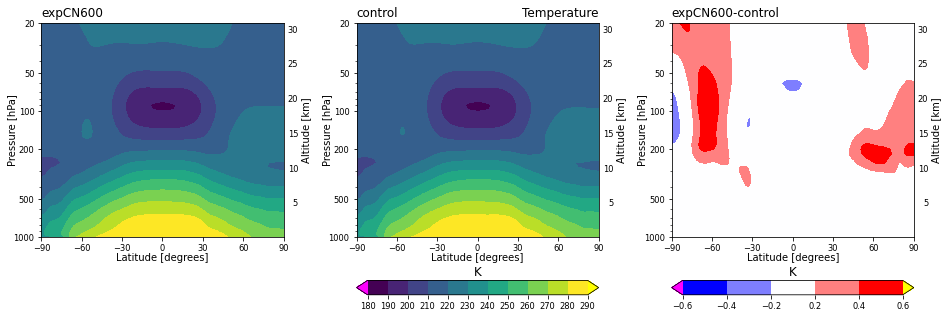


-------------------------------
ind1 is  /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
AREL Average droplet effective radius Range V1 and V2  0.0 9.502442 0.0 9.281308
data1 shape (72, 192)
lev shape (72,)


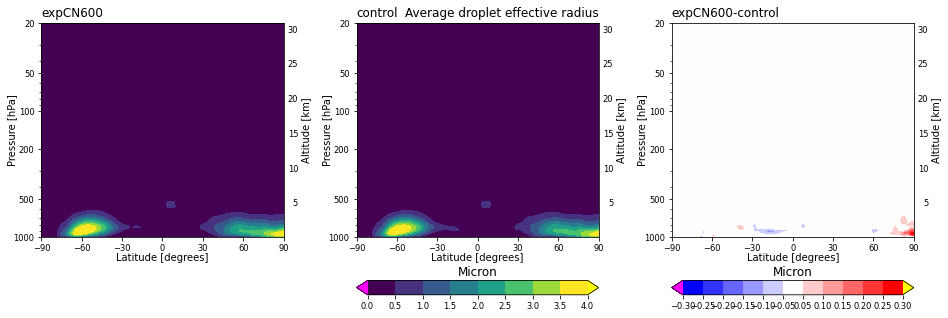


-------------------------------
ind1 is  /work/phil/20221018.v2.LR.F2010.E1_R1-3_CDNC600/20221018.v2.LR.F2010.E1_R1-3_CDNC600_ANN_000101_000512_climo_fv192x288.nc
CLOUD Cloud fraction Range V1 and V2  0.0 95.83731 0.0 95.93093
data1 shape (72, 192)
lev shape (72,)


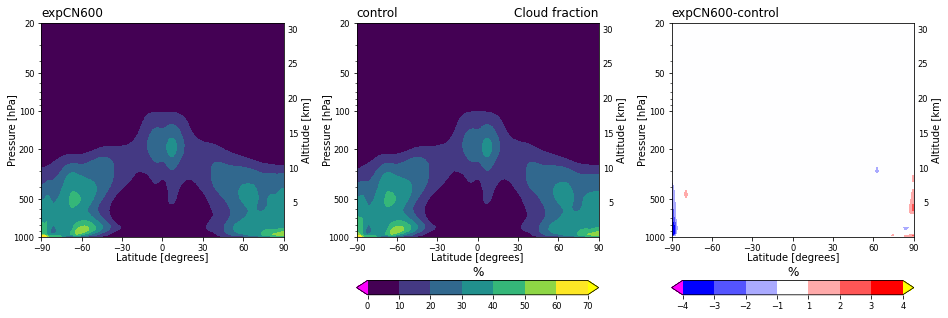

In [17]:

lonsub = DS1['lon'+regtag]#.where(pmask)#.isel(time=0)
latsub = DS1['lat'+regtag]#.where(pmask)#.isel(time=0)
lat = latsub.values
print('subreg',lonsub.min().values,lonsub.max().values, latsub.min().values,latsub.max().values)
#print('subreg size',lonsub.shape)
print('shape and size of variables',lonsub.shape, lonsub.size,' number of unmasked cells ',np.count_nonzero(lonsub.notnull().values))

if 'area' in DS1:
    print('area present in DS1')
    area = xr_getvar('area',DS1,regtag=regtag)#.where(pmask)
    wtsh = area.fillna(0).values
else:
    print('area not found')
    wtsh = make_fvarea(lonsub.values,latsub.values)

print('weights shape',wtsh.shape,wtsh.sum())

Varlist = np.array(['T','AREL','CLOUD'])

#print('wtsh',wtsh)

for Vname in Varlist:
    print()
    print('-------------------------------')
    ind1 = fstring1 % (case_start1,Vname,case_end1)
    print('ind1 is ', ind1)
    DS1 = xr.open_mfdataset(ind1).transpose(...,'lev') # make sure lev is last index
    DS1 = center_time(DS1)
    ind2 = fstring2 % (case_start2,Vname,case_end2)  # make sure lev is last index
    DS2 = xr.open_mfdataset(ind2).transpose(...,'lev') 
    DS2 = center_time(DS2)
    
    V1 = xr_getvar(Vname,DS1,regtag=regtag)#.where(pmask)
    if V1.min().values == V1.max().values:
        print('constant field skipping plot ')
    else:
        V1 = xr_getvar(Vname, DS1, regtag).mean(dim='time',keep_attrs=True)#.where(pmask).squeeze()
        #print('V1xxx ', V1)
        #print('V1',V1.min().values,V1.max().values)
        #print('V1 shape, size, realsize', V1.shape, np.size(V1.values), np.count_nonzero(V1.notnull().values) )
        V2 = xr_getvar(Vname, DS2, regtag).mean(dim='time',keep_attrs=True)#.where(pmask).squeeze()
        DV = V1-V2
        print(Vname, V1.attrs['long_name'],'Range V1 and V2 ',V1.min().values, V1.max().values, V2.min().values, V2.max().values)

        """
        DPOG1 = xr_getvar('DPOG',DS1,regtag=regtag).mean(dim='time',keep_attrs=True)
        print('xxx',wtsh.shape,DPOG1.shape)
        weights1 = wtsh[...,np.newaxis]*DPOG1
        DPOG2 = xr_getvar('DPOG',DS2,regtag=regtag).mean(dim='time',keep_attrs=True)
        weights2 = wtsh[...,np.newaxis]*DPOG2
        V1A = V1.weighted(weights1).mean()
        V2A = V2.weighted(weights2).mean()
        print('V1A %5.3f' % (V1A.values),' V2A %5.3f' % (V2A.values))
        """
        data1 = V1.mean(dim='lon',keep_attrs=True).transpose().values
        print('data1 shape',data1.shape)
        data2 = V2.mean(dim='lon',keep_attrs=True).transpose().values
        datad = data1-data2
        

        lev = V1['lev'].values
        print('lev shape',lev.shape)
    
#        plotZMf(data1, lat_h, lev)
        fig, axes = plt.subplots(ncols=3
                                 ,gridspec_kw={'width_ratios': [1, 1, 1]}
#                                 ,subplot_kw={'projection': ccrs.PlateCarree()}
                                 ,figsize=(16,5)
                                )
        ytop = 20.
        plotZMf(data1, lat, lev,axesa=axes[0],plotOpt={'colorbar':"botnd",'units':V1.units,'ltitle':pref1,'ytop':ytop})
        plotZMf(data2, lat, lev,axesa=axes[1],plotOpt={'colorbar':"bot",'units':V2.units,'ltitle':pref2,'rtitle':V2.long_name,'ytop':ytop})
        dlevs = findNiceContours(np.array([datad.min(),datad.max()]),nlevs = 10, rmClev=0.,sym=True)
        dmap = diverge_map()
        plotZMf(datad, lat, lev,axesa=axes[2],plotOpt={'clevs':dlevs,'cmap':dmap,'colorbar':"bot",'units':V2.units,'ytop':ytop,'ltitle':pref1+'-'+pref2})

        #print('attribute check on xarray',hasattr(V1,'units'))
        #plt.savefig('test_'+Vname+'.jpg',format='jpg')
        #plt.tight_layout()
        plt.show()
      


In [ ]:
# next cells not used
help(xr_getvar)
1./0.